<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n250.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.149383,10.198125,51.347509,40.213569,11.133940
1,0.0,1.0,68.371701,4.858040,83.229741,78.524702,4.705039
2,0.0,2.0,43.810902,-21.193472,32.617430,53.245458,-20.628028
3,0.0,3.0,46.494482,-7.496310,48.998172,56.007537,-7.009365
4,0.0,4.0,96.719309,2.895547,109.614855,107.701523,1.913332
...,...,...,...,...,...,...,...
249995,999.0,245.0,41.329737,8.886786,60.216522,52.733948,7.482574
249996,999.0,246.0,22.708933,-0.908641,31.800293,33.972475,-2.172182
249997,999.0,247.0,58.034742,14.457779,82.492520,69.565150,12.927370
249998,999.0,248.0,59.573177,-0.108383,69.464794,71.115207,-1.650414


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.149383,10.198125,51.347509,40.213569,11.133940
1,0.0,1.0,68.371701,4.858040,83.229741,78.524702,4.705039
2,0.0,2.0,43.810902,-21.193472,32.617430,53.245458,-20.628028
3,0.0,3.0,46.494482,-7.496310,48.998172,56.007537,-7.009365
4,0.0,4.0,96.719309,2.895547,109.614855,107.701523,1.913332
...,...,...,...,...,...,...,...
249995,999.0,245.0,41.329737,8.886786,60.216522,52.733948,7.482574
249996,999.0,246.0,22.708933,-0.908641,31.800293,33.972475,-2.172182
249997,999.0,247.0,58.034742,14.457779,82.492520,69.565150,12.927370
249998,999.0,248.0,59.573177,-0.108383,69.464794,71.115207,-1.650414


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.149383,10.198125,51.347509,40.213569,11.133940
1,0.0,1.0,68.371701,4.858040,83.229741,78.524702,4.705039
2,0.0,2.0,43.810902,-21.193472,32.617430,53.245458,-20.628028
3,0.0,3.0,46.494482,-7.496310,48.998172,56.007537,-7.009365
4,0.0,4.0,96.719309,2.895547,109.614855,107.701523,1.913332
...,...,...,...,...,...,...,...
249995,999.0,245.0,41.329737,8.886786,60.216522,52.733948,7.482574
249996,999.0,246.0,22.708933,-0.908641,31.800293,33.972475,-2.172182
249997,999.0,247.0,58.034742,14.457779,82.492520,69.565150,12.927370
249998,999.0,248.0,59.573177,-0.108383,69.464794,71.115207,-1.650414


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

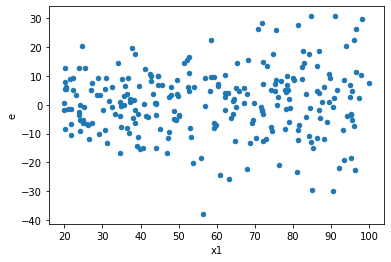

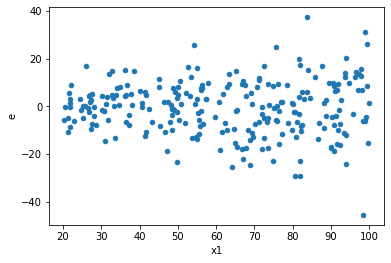

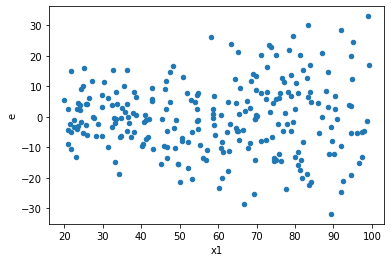

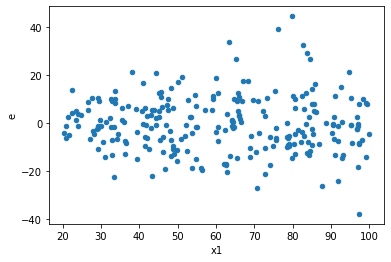

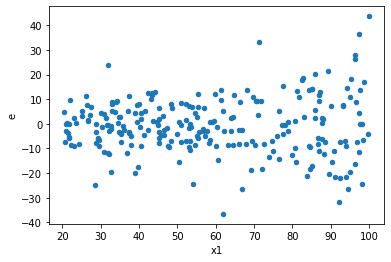

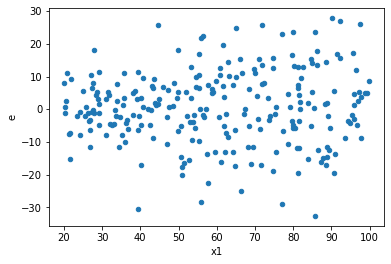

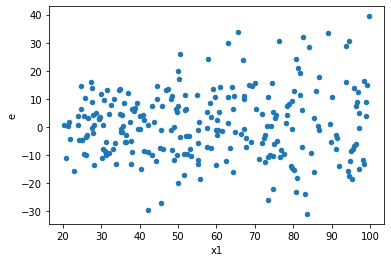

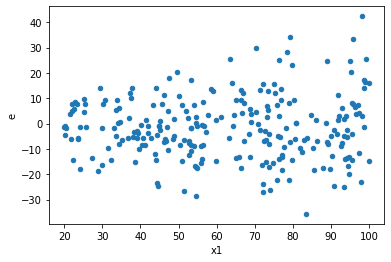

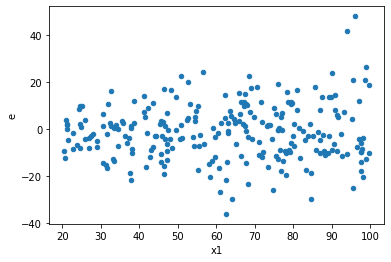

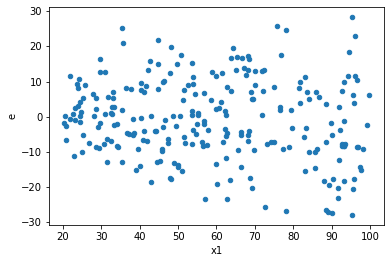

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,6684.011904666455,17177.48335692785,67.51527176430763,173.5099328982611,2.5699360805948532,4.198941841337955e-06,0.9999979005290793,2.0994709206689777e-06,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,5728.252555190233,20328.382368672963,57.86113692111346,205.33719564316124,3.54879296483775,1.1088809870329897e-09,0.9999999994455595,5.544404935164948e-10,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,7822.651153171479,22873.536183043558,79.01667831486343,231.04582003074302,2.9240133217202344,1.9431341380382605e-07,0.9999999028432931,9.715670690191303e-08,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,7035.324349141942,13705.754342934732,71.06388231456506,138.44196305994677,1.9481339683516288,0.0010401386253635625,0.9994799306873182,0.0005200693126817812,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,7131.379090470323,20652.073833325227,72.03413222697296,208.60680639722452,2.8959439080896203,2.470731872428189e-07,0.9999998764634064,1.2353659362140945e-07,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,7860.713953028641,18453.76889798857,79.40115104069335,186.4017060402886,2.3475945070967184,3.0025924466769993e-05,0.9999849870377666,1.5012962233384997e-05,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,7070.065077679268,18591.40622402139,71.41479876443705,187.7919820608221,2.6295947802115527,2.486981073523964e-06,0.9999987565094632,1.243490536761982e-06,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,6402.936236564077,27375.074767601414,64.67612360165735,276.5159067434486,4.275393937436949,4.319877788816484e-12,0.9999999999978401,2.159938894408242e-12,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,7714.601542038459,24461.497237667685,77.92526810139857,247.08583068351197,3.1708050123356246,2.4200073500679764e-08,0.9999999878999632,1.2100036750339882e-08,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,6684.011904666455,17177.48335692785,67.51527176430763,173.5099328982611,2.5699360805948532,4.198941841337955e-06,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,5728.252555190233,20328.382368672963,57.86113692111346,205.33719564316124,3.54879296483775,1.1088809870329897e-09,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,7822.651153171479,22873.536183043558,79.01667831486343,231.04582003074302,2.9240133217202344,1.9431341380382605e-07,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,7035.324349141942,13705.754342934732,71.06388231456506,138.44196305994677,1.9481339683516288,0.0010401386253635625,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,7131.379090470323,20652.073833325227,72.03413222697296,208.60680639722452,2.8959439080896203,2.470731872428189e-07,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,7860.713953028641,18453.76889798857,79.40115104069335,186.4017060402886,2.3475945070967184,3.0025924466769993e-05,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,7070.065077679268,18591.40622402139,71.41479876443705,187.7919820608221,2.6295947802115527,2.486981073523964e-06,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,6402.936236564077,27375.074767601414,64.67612360165735,276.5159067434486,4.275393937436949,4.319877788816484e-12,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,7714.601542038459,24461.497237667685,77.92526810139857,247.08583068351197,3.1708050123356246,2.4200073500679764e-08,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    997
Reject005=1 : Homoscedasticity        3
Name: Result_test, dtype: int64